In [11]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt
from keras import optimizers
from keras import layers 
from keras import models 

In [3]:
datagen = ImageDataGenerator(rotation_range=40, 
                            width_shift_range=0.2, 
                            height_shift_range=0.2, 
                            shear_range=0.2, 
                            zoom_range=0.2, 
                            horizontal_flip=True, 
                            fill_mode='nearest')

Let’s quickly go over this code: 
- `rotation_range` is a value in degrees (0–180), a range within which to randomly rotate pictures.   
- `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.  
- `shear_range` is for randomly applying shearing transformations.   
- `zoom_range` is for randomly zooming inside pictures.   
- `horizontal_flip` is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).   
- `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [8]:
train_cats_dir = './Data/cats_and_dogs_small/train/cats'
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

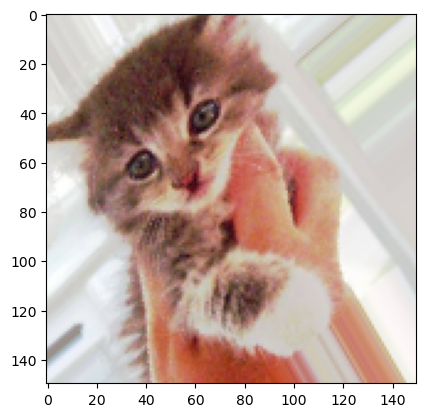

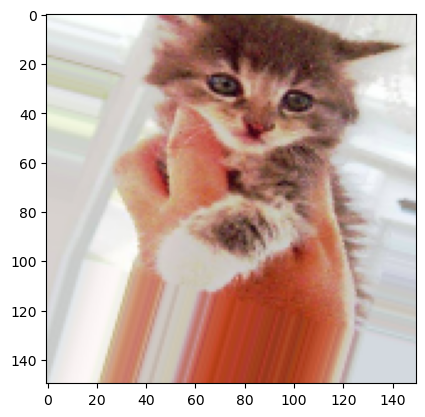

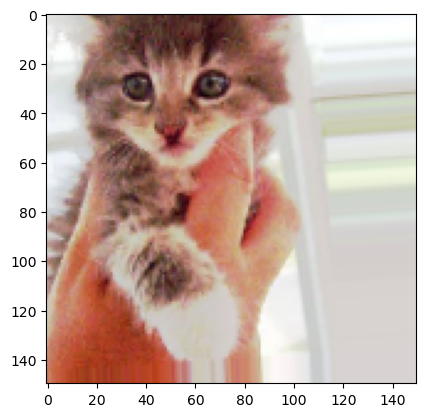

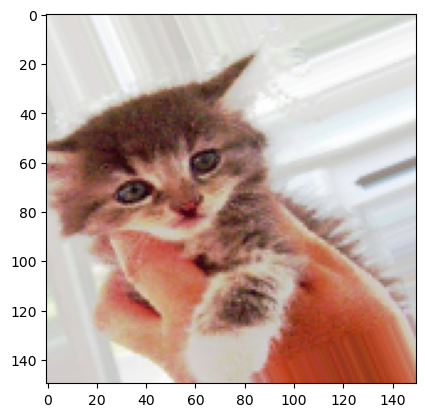

In [12]:
img = image.load_img(img_path, 
                target_size = (150,150))

x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape) # Reshapes it to (1, 150,150,3)

i = 0 
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 4 == 0:
        break

plt.show()

# Adding a Dropout Layer to Address Overfitting

In [13]:
model = models.Sequential() 

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2))) 

model.add(layers.Conv2D(64, (3,3), activation='relu')) 
model.add(layers.MaxPooling2D((2,2))) 

model.add(layers.Conv2D(128, (3,3), activation='relu')) 
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu')) 
model.add(layers.MaxPooling2D((2,2))) 

model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(loss = 'binary_crossentropy', 
            optimizer = optimizers.RMSprop(learning_rate = 1e-4), 
            metrics = ['acc'])

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                        rotation_range=40, 
                        width_shift_range=0.2, 
                        height_shift_range=0.2, 
                        shear_range=0.2, 
                        zoom_range=0.2, 
                        horizontal_flip=True,)

# Validation data shouldn't be augmented since this is only for training 
valid_datagen=ImageDataGenerator(rescale=1./255)

In [23]:
train_dir = "./Data/cats_and_dogs_small/train"
valid_dir = "./Data/cats_and_dogs_small/valid"

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150,150), 
    batch_size = 25, 
    class_mode = 'binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, 
    target_size = (150,150), 
    batch_size = 25, 
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
2000/32

62.5

In [24]:
history = model.fit(
    train_generator, 
    steps_per_epoch = 2000/25, 
    epochs = 100, 
    validation_data = valid_generator, 
    validation_steps = 1000/25
)

Epoch 1/100
80/80 [==============================] - 99s 1s/step - loss: 0.6826 - acc: 0.5605 - val_loss: 0.6676 - val_acc: 0.5880
Epoch 2/100
80/80 [==============================] - 92s 1s/step - loss: 0.6724 - acc: 0.5770 - val_loss: 0.6718 - val_acc: 0.5720
Epoch 3/100
80/80 [==============================] - 101s 1s/step - loss: 0.6713 - acc: 0.5685 - val_loss: 0.6526 - val_acc: 0.6090
Epoch 4/100
80/80 [==============================] - 102s 1s/step - loss: 0.6670 - acc: 0.5865 - val_loss: 0.6457 - val_acc: 0.6130
Epoch 5/100
80/80 [==============================] - 110s 1s/step - loss: 0.6572 - acc: 0.6010 - val_loss: 0.6396 - val_acc: 0.6150
Epoch 6/100
80/80 [==============================] - 108s 1s/step - loss: 0.6540 - acc: 0.6060 - val_loss: 0.6502 - val_acc: 0.6170
Epoch 7/100
80/80 [==============================] - 108s 1s/step - loss: 0.6408 - acc: 0.6145 - val_loss: 0.6234 - val_acc: 0.6360
Epoch 8/100
80/80 [==============================] - 97s 1s/step - loss: 0.629

In [27]:
model.save('models/cats_and_dogs_small_2.keras')

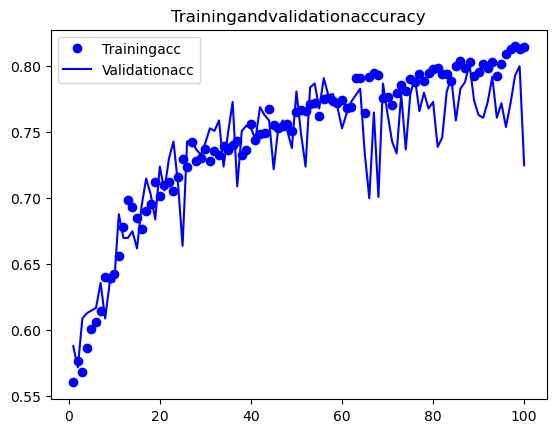

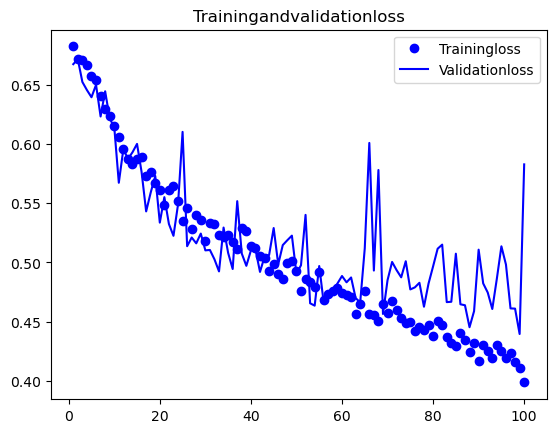

In [28]:
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs=range(1,len(acc)+1) 

plt.plot(epochs,acc,'bo',label='Trainingacc') 
plt.plot(epochs,val_acc,'b',label='Validationacc') 
plt.title('Trainingandvalidationaccuracy') 
plt.legend() 
plt.figure() 

plt.plot(epochs,loss,'bo',label='Trainingloss') 
plt.plot(epochs,val_loss,'b',label='Validationloss') 
plt.title('Trainingandvalidationloss') 
plt.legend() 
plt.show()